In [1]:
import pandas as pd 
import folium
from folium.plugins import HeatMap
from folium import plugins
import numpy as np
import pandas as pd
from vega_datasets import data as vds
import json

### data is here https://data.world/shad/covid-19-time-series-data

In [2]:
data = pd.read_csv('covid_confirmed.csv')

In [3]:
data.head()

Province/State Country/Region      Lat      Long  1/22/2020  1/23/2020  \
0            NaN       Thailand  15.0000  101.0000          2          3   
1            NaN          Japan  36.0000  138.0000          2          1   
2            NaN      Singapore   1.2833  103.8333          0          1   
3            NaN          Nepal  28.1667   84.2500          0          0   
4            NaN       Malaysia   2.5000  112.5000          0          0   

   1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  3/8/2020  3/9/2020  \
0          5          7          8          8  ...        50        50   
1          2          2          4          4  ...       502       511   
2          3          3          4          5  ...       150       150   
3          0          1          1          1  ...         1         1   
4          0          3          4          4  ...        99       117   

   3/10/2020  3/11/2020  3/12/2020  3/13/2020  3/14/2020  3/15/2020  \
0         53         59         70         75         82        114   
1        581        639        639        701        773        839   
2        160        178        178        200        212        226   
3          1          1          1          1          1          1   
4        129        149        149        197        238        428   

   3/16/2020  3/17/2020  
0        147        177  
1        825        878  
2        243        266  
3          1          1  
4        566        673  

[5 rows x 60 columns]

In [4]:
dates = data.columns[4:]

In [5]:
lat = list(data.Lat)
long = list(data.Long)
coord = [list(a) for a in zip(lat,long)]
data_covid = []
for date in dates:
    data[date] = data[date]*100
    inter_data = data[['Lat', 'Long', date]].values.tolist()
    data_covid.append(inter_data)

In [6]:
data_covid[0]

[[15.0, 101.0, 200.0],
 [36.0, 138.0, 200.0],
 [1.2833, 103.8333, 0.0],
 [28.1667, 84.25, 0.0],
 [2.5, 112.5, 0.0],
 [49.2827, -123.1207, 0.0],
 [-33.8688, 151.2093, 0.0],
 [-37.8136, 144.9631, 0.0],
 [-28.0167, 153.4, 0.0],
 [11.55, 104.9167, 0.0],
 [7.0, 81.0, 0.0],
 [51.0, 9.0, 0.0],
 [64.0, 26.0, 0.0],
 [24.0, 54.0, 0.0],
 [13.0, 122.0, 0.0],
 [21.0, 78.0, 0.0],
 [43.0, 12.0, 0.0],
 [63.0, 16.0, 0.0],
 [40.0, -4.0, 0.0],
 [-34.9285, 138.6007, 0.0],
 [50.8333, 4.0, 0.0],
 [26.0, 30.0, 0.0],
 [35.4437, 139.638, 0.0],
 [33.8547, 35.8623, 0.0],
 [33.0, 44.0, 0.0],
 [21.0, 57.0, 0.0],
 [33.0, 65.0, 0.0],
 [26.0275, 50.55, 0.0],
 [29.5, 47.75, 0.0],
 [28.0339, 1.6596, 0.0],
 [45.1, 15.2, 0.0],
 [46.8182, 8.2275, 0.0],
 [47.5162, 14.5501, 0.0],
 [31.0, 35.0, 0.0],
 [30.3753, 69.3451, 0.0],
 [-14.235, -51.9253, 0.0],
 [42.3154, 43.3569, 0.0],
 [39.0742, 21.8243, 0.0],
 [41.6086, 21.7453, 0.0],
 [60.472, 8.4689, 0.0],
 [45.9432, 24.9668, 0.0],
 [58.5953, 25.0136, 0.0],
 [43.9424, 12.4578, 0

In [7]:
# map
map_heatmap_time = folium.Map([39, -98], tiles='CartoDB Dark_Matter', zoom_start=3)

# heatmap plugin
heatmap_time_plugin = plugins.HeatMapWithTime(data_covid, radius=10, 
                                              gradient={0.003: 'blue', 0.004: 'lime', 0.005: 'orange', 0.003: 'red'}, 
                                              min_opacity=0.2, max_opacity=0.8, use_local_extrema=True, 
                                              index=list(dates))

# add heatmap plugin to map
heatmap_time_plugin.add_to(map_heatmap_time)

# display map
map_heatmap_time

## Try with another dataset form dataworld
data is here https://data.world/covid-19-data-resource-hub/covid-19-case-counts/workspace/file?filename=COVID-19+Cases.csv

In [8]:
data = pd.read_csv('COVID-19 Cases_march_22.csv')
data.head()

Date Country_Region Province_State  Case_Type  Cases  Difference  \
0  3/11/2020             US        Arizona  Recovered      0           0   
1  3/11/2020             US        Arizona     Deaths      0           0   
2  3/11/2020             US        Arizona  Confirmed      0           0   
3  3/11/2020             US        Arizona     Active      0           0   
4  2/15/2020             US        Arizona  Recovered      0           0   

      Prep_Flow_Runtime Latest_Date      Lat      Long  
0  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661  
1  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661  
2  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661  
3  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661  
4  3/21/2020 7:39:09 AM   3/20/2020  32.8162 -111.2845

In [9]:
data.dtypes

Date                  object
Country_Region        object
Province_State        object
Case_Type             object
Cases                  int64
Difference             int64
Prep_Flow_Runtime     object
Latest_Date           object
Lat                  float64
Long                 float64
dtype: object

In [10]:
data['date']=pd.to_datetime(data["Date"])

In [11]:
data.head()

Date Country_Region Province_State  Case_Type  Cases  Difference  \
0  3/11/2020             US        Arizona  Recovered      0           0   
1  3/11/2020             US        Arizona     Deaths      0           0   
2  3/11/2020             US        Arizona  Confirmed      0           0   
3  3/11/2020             US        Arizona     Active      0           0   
4  2/15/2020             US        Arizona  Recovered      0           0   

      Prep_Flow_Runtime Latest_Date      Lat      Long       date  
0  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661 2020-03-11  
1  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661 2020-03-11  
2  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661 2020-03-11  
3  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661 2020-03-11  
4  3/21/2020 7:39:09 AM   3/20/2020  32.8162 -111.2845 2020-02-15

In [12]:
dates = [d.strftime('%Y%m%d') for d in data.date]
data['date_mark'] = dates

In [13]:
# sort by date in ascending
data.sort_values(by='date', inplace=True)
data.head()

Date Country_Region Province_State  Case_Type  Cases  Difference  \
90706   1/23/2020         Mexico            NaN  Confirmed      0           0   
30658   1/23/2020             US         Oregon  Confirmed      0           0   
102540  1/23/2020         Canada   Saskatchewan  Recovered      0           0   
102541  1/23/2020         Canada   Saskatchewan     Deaths      0           0   
102542  1/23/2020         Canada   Saskatchewan  Confirmed      0           0   

           Prep_Flow_Runtime Latest_Date      Lat      Long       date  \
90706   3/21/2020 7:39:09 AM   3/20/2020  23.6345 -102.5528 2020-01-23   
30658   3/21/2020 7:39:09 AM   3/20/2020  44.8446 -122.5927 2020-01-23   
102540  3/21/2020 7:39:09 AM   3/20/2020  52.9399 -106.4509 2020-01-23   
102541  3/21/2020 7:39:09 AM   3/20/2020  52.9399 -106.4509 2020-01-23   
102542  3/21/2020 7:39:09 AM   3/20/2020  52.9399 -106.4509 2020-01-23   

       date_mark  
90706   20200123  
30658   20200123  
102540  20200123  
102541  20200123  
102542  20200123

In [14]:
data_conf = data[data.Case_Type=='Confirmed']
dates = [d.strftime('%Y%m%d') for d in data_conf.date]
dates = set(dates)
dates = list(dates)

# coefficient for normalization
k_norm = data_conf.Cases.max()
data_conf.Cases = data_conf.Cases/k_norm

/jet/var/python/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
def MyFn(s):
    return ''.join(str(s).split('-'))[:8]
dates =sorted(dates, key=MyFn)

In [16]:
dates[:5]

['20200123', '20200124', '20200125', '20200126', '20200127']

In [17]:
data_covid = []
for date in dates:
    data_conf2 = data_conf[data_conf.date_mark==date]
    inter_data = data_conf2[['Lat', 'Long', 'Cases']].values.tolist()
    data_covid.append(inter_data)

In [18]:
data_covid[-1]

[[36.0, 138.0, 0.01420353982300885],
 [32.7767, -96.79700000000001, 0.0],
 [35.6301, -79.8064, 0.002536873156342183],
 [44.6939, -69.3819, 0.0008259587020648968],
 [32.7157, -117.1611, 0.0],
 [43.0186, -89.5498, 0.0],
 [41.2603, -111.9522, 0.0],
 [44.0459, -72.7107, 0.00042772861356932154],
 [-12.4634, 130.8456, 4.424778761061947e-05],
 [33.2918, -112.4291, 0.0],
 [41.6809, -71.5118, 0.0007964601769911505],
 [32.8162, -111.2845, 0.0],
 [22.3, 114.2, 0.0037758112094395282],
 [-28.0167, 153.4, 0.002713864306784661],
 [37.2692, 106.1655, 0.0011061946902654867],
 [45.6945, -93.9002, 0.001696165191740413],
 [37.6681, -84.6701, 0.0006932153392330383],
 [40.9629, -112.0953, 0.0],
 [34.8405, -106.2485, 0.0006342182890855457],
 [28.0339, 1.6596, 0.001327433628318584],
 [40.1824, 116.4142, 0.0072418879056047195],
 [53.7609, -98.8139, 0.00025073746312684363],
 [16.0, 108.0, 0.0013421828908554573],
 [15.0, 101.0, 0.004749262536873156],
 [9.145, 40.4897, 0.00013274336283185842],
 [40.0691, 45.0382,

In [19]:
# map
map_heatmap_time = folium.Map([39, -98], tiles='CartoDB Dark_Matter', zoom_start=3)

# heatmap plugin
heatmap_time_plugin = plugins.HeatMapWithTime(data_covid, radius=6, 
                                              gradient={0.004: 'orange', 0.08: 'red'}, 
                                              min_opacity=0.7, max_opacity=0.1, use_local_extrema=True, 
                                              index=dates)

# add heatmap plugin to map
heatmap_time_plugin.add_to(map_heatmap_time)

# display map
map_heatmap_time

## Bokeh visualisation

In [10]:
# import 
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, reset_output
from bokeh.models import HoverTool
output_notebook()

import pandas as pd
import numpy as np

Loading BokehJS ...

In [11]:
data = pd.read_csv('COVID-19 Cases_march_22.csv')
data.head()

Date Country_Region Province_State  Case_Type  Cases  Difference  \
0  3/11/2020             US        Arizona  Recovered      0           0   
1  3/11/2020             US        Arizona     Deaths      0           0   
2  3/11/2020             US        Arizona  Confirmed      0           0   
3  3/11/2020             US        Arizona     Active      0           0   
4  2/15/2020             US        Arizona  Recovered      0           0   

      Prep_Flow_Runtime Latest_Date      Lat      Long  
0  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661  
1  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661  
2  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661  
3  3/21/2020 7:39:09 AM   3/20/2020  32.0575 -111.6661  
4  3/21/2020 7:39:09 AM   3/20/2020  32.8162 -111.2845

In [12]:
data.dtypes

Date                  object
Country_Region        object
Province_State        object
Case_Type             object
Cases                  int64
Difference             int64
Prep_Flow_Runtime     object
Latest_Date           object
Lat                  float64
Long                 float64
dtype: object

In [13]:
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y')

In [14]:
data.dtypes

Date                 datetime64[ns]
Country_Region               object
Province_State               object
Case_Type                    object
Cases                         int64
Difference                    int64
Prep_Flow_Runtime            object
Latest_Date                  object
Lat                         float64
Long                        float64
dtype: object

In [15]:
# group by Case_Type 
data_country = data.groupby(['Date', 'Case_Type']).sum()

In [16]:
# reset the index, make them as columns (Date and Case_Type)
data_country = data_country.reset_index()

In [17]:
data_country.head()

Date  Case_Type  Cases  Difference        Lat        Long
0 2020-01-23     Active    605          95  14770.569 -16490.0391
1 2020-01-23  Confirmed    653          98  14770.569 -16490.0391
2 2020-01-23     Deaths     18           1  14770.569 -16490.0391
3 2020-01-23  Recovered     30           2  14770.569 -16490.0391
4 2020-01-24     Active    879         274  14770.569 -16490.0391

In [18]:
# create a column with date as string
data_country['date_str'] = data_country['Date'].dt.strftime('%m/%d/%y')

In [19]:
data_country.head()

Date  Case_Type  Cases  Difference        Lat        Long  date_str
0 2020-01-23     Active    605          95  14770.569 -16490.0391  01/23/20
1 2020-01-23  Confirmed    653          98  14770.569 -16490.0391  01/23/20
2 2020-01-23     Deaths     18           1  14770.569 -16490.0391  01/23/20
3 2020-01-23  Recovered     30           2  14770.569 -16490.0391  01/23/20
4 2020-01-24     Active    879         274  14770.569 -16490.0391  01/24/20

In [20]:
# data
# use vega_datasets iris data

# plot 
species = ['Active', 'Confirmed', 'Deaths', 'Recovered']
markers = ['hex', 'cross', 'triangle', 'circle']

scatter_plot_subgroups = figure(plot_width=600, 
                                plot_height=400, 
                                title ='Covid-19', 
                                x_axis_label='Date', 
                                y_axis_label='Cases',
                                x_axis_type='datetime')

scatter_plot_subgroups.scatter(x='Date',
                               y='Cases',
                               source=data_country,
                               legend='Case_Type',
                               fill_alpha=0.5,
                               size=15,
                               color=factor_cmap(field_name='Case_Type', palette='Dark2_3', factors=species),
                               marker=factor_mark('Case_Type', markers, species)
                              )

# move legend
scatter_plot_subgroups.legend.location = 'top_left'

# add hoover tool
hover = HoverTool()
hover.tooltips=[
    ('Case', '@Case_Type'),
    ('number of cases', '@Cases'),
    ('Date', '@date_str')
]
    
scatter_plot_subgroups.add_tools(hover)
    
show(scatter_plot_subgroups)


/jet/var/python/lib/python3.6/site-packages/bokeh/models/mappers.py:147: UserWarning: Palette length does not match number of factors. ['Recovered'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [27]:
data = pd.read_csv('COVID-19 Cases_march_22.csv')
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y')
# create a column with date as string (to write this)
data['date_str'] = data['Date'].dt.strftime('%m/%d/%y')

In [28]:
data_country = data.groupby(['Date', 'Country_Region', 'Case_Type'], as_index=False).agg({'Cases':'sum', 'Lat':'mean', 'Long':'mean'})

In [29]:
data_country.head()

Date Country_Region  Case_Type  Cases      Lat     Long
0 2020-01-23    Afghanistan     Active      0  33.0000  65.0000
1 2020-01-23    Afghanistan  Confirmed      0  33.0000  65.0000
2 2020-01-23    Afghanistan     Deaths      0  33.0000  65.0000
3 2020-01-23    Afghanistan  Recovered      0  33.0000  65.0000
4 2020-01-23        Albania     Active      0  41.1533  20.1683

In [33]:
len(set(data_country['Country_Region']))

162

In [34]:
# make dataframe with Case_Type=Active
data_country_act = data_country[data_country.Case_Type=='Active']

In [37]:
print(len(list(data_country_act.Country_Region))==len(set(data_country_act.Country_Region))

False

In [35]:
# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, CategoricalColorMapper, NumeralTickFormatter
from bokeh.layouts import gridplot

# Output inline in the notebook
#output_file('phi-gm-linked-selections.html', title='7XXX')

# Store the data in a ColumnDataSource
gm_stats_cds = ColumnDataSource(data_country_act)

# Create a CategoricalColorMapper that assigns specific colors to wins and losses
case_mapper = CategoricalColorMapper(factors = ['Active', 'Confirmed', 'Deaths', 'Recovered'],
                                     palette=['Green', 'Red', 'Black', 'Blue'])

# Specify the tools
toolList = ['lasso_select', 'tap', 'reset', 'save']

# Create a figure relating the lat long
pctFig = figure(title='Location',
                plot_height=400, plot_width=400, tools=toolList,
                x_axis_label='Lat', y_axis_label='Long')

# Draw with circle markers
pctFig.circle(x='Lat', y='Long', source=gm_stats_cds, 
              size=12, color='black')

# Format the y-axis tick labels as percenages
pctFig.xaxis[0].formatter = NumeralTickFormatter(format='00.0%')
pctFig.yaxis[0].formatter = NumeralTickFormatter(format='00.0%')

# Create a figure relating the totals
totFig = figure(title='date vs cases',
                plot_height=400, plot_width=400, tools=toolList,
                x_axis_label='Date', y_axis_label='Cases')

# Draw with square markers
totFig.square(x='Date', y='Cases', source=gm_stats_cds, size=10,
              color=dict(field='Case_Type', transform=case_mapper))

# Create layout
grid = gridplot([[pctFig, totFig]])

# Visualize
show(grid)


# crossfilter example

In [9]:
import pandas as pd

from bokeh.layouts import column, row
from bokeh.models import Select
from bokeh.palettes import Spectral5
from bokeh.plotting import curdoc, figure, show
from bokeh.sampledata.autompg import autompg_clean as df

# trick for Jupyter Notebook
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
output_notebook()

df = df.copy()

SIZES = list(range(6, 22, 3))
COLORS = Spectral5
N_SIZES = len(SIZES)
N_COLORS = len(COLORS)

# data cleanup
df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)
del df['name']

columns = sorted(df.columns)
discrete = [x for x in columns if df[x].dtype == object]
continuous = [x for x in columns if x not in discrete]

def create_figure():
    xs = df[x.value].values
    ys = df[y.value].values
    x_title = x.value.title()
    y_title = y.value.title()

    kw = dict()
    if x.value in discrete:
        kw['x_range'] = sorted(set(xs))
    if y.value in discrete:
        kw['y_range'] = sorted(set(ys))
    kw['title'] = "%s vs %s" % (x_title, y_title)

    p = figure(plot_height=600, plot_width=800, tools='pan,box_zoom,hover,reset', **kw)
    p.xaxis.axis_label = x_title
    p.yaxis.axis_label = y_title

    if x.value in discrete:
        p.xaxis.major_label_orientation = pd.np.pi / 4

    sz = 9
    if size.value != 'None':
        if len(set(df[size.value])) > N_SIZES:
            groups = pd.qcut(df[size.value].values, N_SIZES, duplicates='drop')
        else:
            groups = pd.Categorical(df[size.value])
        sz = [SIZES[xx] for xx in groups.codes]

    c = "#31AADE"
    if color.value != 'None':
        if len(set(df[color.value])) > N_COLORS:
            groups = pd.qcut(df[color.value].values, N_COLORS, duplicates='drop')
        else:
            groups = pd.Categorical(df[color.value])
        c = [COLORS[xx] for xx in groups.codes]

    p.circle(x=xs, y=ys, color=c, size=sz, line_color="white", alpha=0.6, hover_color='white', hover_alpha=0.5)

    return p


def update(attr, old, new):
    layout.children[1] = create_figure()


x = Select(title='X-Axis', value='mpg', options=columns)
x.on_change('value', update)

y = Select(title='Y-Axis', value='hp', options=columns)
y.on_change('value', update)

size = Select(title='Size', value='None', options=['None'] + continuous)
size.on_change('value', update)

color = Select(title='Color', value='None', options=['None'] + continuous)
color.on_change('value', update)

controls = column(x, y, color, size, width=200)
layout = row(controls, create_figure())


def modify_doc(doc):
    doc.add_root(row(layout, width=800))
    doc.title = "Sliders"
    text.on_change('value', update_title)
    
handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)

Loading BokehJS ...

In [8]:
############ START BOILERPLATE ############
#### Interactivity -- BOKEH
import bokeh.plotting.figure as bk_figure
from bokeh.io import curdoc, show
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource, Column
from bokeh.models.widgets import Slider, TextInput
from bokeh.io import output_notebook # enables plot interface in J notebook
import numpy as np

from bokeh.plotting import figure, output_file, save
# init bokeh

from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler

############ END BOILERPLATE ############

N = 200
x = np.linspace(0, 4*np.pi, N)
y = np.sin(x)
source = ColumnDataSource(data=dict(x=x, y=y))

# Set up plot
plot = bk_figure(plot_height=400, plot_width=400, title="my sine wave",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[0, 4*np.pi], y_range=[-2.5, 2.5])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

# Set up widgets
text = TextInput(title="title", value='my sine wave')
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)
phase = Slider(title="phase", value=0.0, start=0.0, end=2*np.pi)
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)

# Set up callbacks
def update_title(attrname, old, new):
    plot.title.text = text.value



def update_data(attrname, old, new):
    # Get the current slider values
    a = amplitude.value
    b = offset.value
    w = phase.value
    k = freq.value

    # Generate the new curve
    x = np.linspace(0, 4*np.pi, N)
    y = a*np.sin(k*x + w) + b

    source.data = dict(x=x, y=y)
    ### I thought I might need a show() here, but it doesn't make a difference if I add one
    # show(layout)

for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)


# Set up layouts and add to document
inputs = Column(text, offset, amplitude, phase, freq)
layout = row(plot,
             Column(text, offset, amplitude, phase, freq))



def modify_doc(doc):
    doc.add_root(row(layout, width=500))
    doc.title = "Sliders"
    text.on_change('value', update_title)


handler = FunctionHandler(modify_doc)
app = Application(handler)

show(app)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
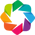

In [39]:
import pandas as pd
import numpy as np
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [41]:
"""
Example app demonstrating how to use the HoloViews API to generate
a bokeh app with complex interactivity. Uses a RangeXY stream to allow
interactive exploration of the mandelbrot set.
"""

import numpy as np
import holoviews as hv

from holoviews import opts
from holoviews.streams import RangeXY
from numba import jit

renderer = hv.renderer('bokeh')

@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

def get_fractal(x_range, y_range):
    (x0, x1), (y0, y1) = x_range, y_range
    image = np.zeros((600, 600), dtype=np.uint8)
    return hv.Image(create_fractal(x0, x1, -y1, -y0, image, 200),
                    bounds=(x0, y0, x1, y1))

# Define stream linked to axis XY-range
range_stream = RangeXY(x_range=(-1., 1.), y_range=(-1., 1.))

# Create DynamicMap to compute fractal per zoom range and
# adjoin a logarithmic histogram
dmap = hv.DynamicMap(get_fractal, label='Manderbrot Explorer',
                     streams=[range_stream]).hist(log=True)

# Apply options
dmap.opts(
    opts.Histogram(framewise=True, logy=True, width=200),
    opts.Image(cmap='fire', logz=True, height=600, width=600,
               xaxis=None, yaxis=None))

doc = renderer.server_doc(dmap)
doc.title = 'Mandelbrot Explorer'

In [44]:

import holoviews as hv
import panel as pn
import panel.widgets as pnw

from bokeh.sampledata.autompg import autompg

df = autompg.copy()

ORIGINS = ['North America', 'Europe', 'Asia']

# data cleanup
df.origin = [ORIGINS[x-1] for x in df.origin]

df['mfr'] = [x.split()[0] for x in df.name]
df.loc[df.mfr=='chevy', 'mfr'] = 'chevrolet'
df.loc[df.mfr=='chevroelt', 'mfr'] = 'chevrolet'
df.loc[df.mfr=='maxda', 'mfr'] = 'mazda'
df.loc[df.mfr=='mercedes-benz', 'mfr'] = 'mercedes'
df.loc[df.mfr=='toyouta', 'mfr'] = 'toyota'
df.loc[df.mfr=='vokswagen', 'mfr'] = 'volkswagen'
df.loc[df.mfr=='vw', 'mfr'] = 'volkswagen'
del df['name']

columns = sorted(df.columns)
discrete = [x for x in columns if df[x].dtype == object]
continuous = [x for x in columns if x not in discrete]
quantileable = [x for x in continuous if len(df[x].unique()) > 20]

x = pnw.Select(name='X-Axis', value='mpg', options=quantileable)
y = pnw.Select(name='Y-Axis', value='hp', options=quantileable)
size = pnw.Select(name='Size', value='None', options=['None'] + quantileable)
color = pnw.Select(name='Color', value='None', options=['None'] + quantileable)

@pn.depends(x.param.value, y.param.value, color.param.value, size.param.value) 
def create_figure(x, y, color, size):
    opts = dict(cmap='rainbow', width=800, height=600, line_color='black')
    if color != 'None':
        opts['color'] = color 
    if size != 'None':
        opts['size'] = hv.dim(size).norm()*20
    return hv.Points(df, [x, y], label="%s vs %s" % (x.title(), y.title())).opts(**opts)

widgets = pn.WidgetBox(x, y, color, size, width=200)

pn.Row(widgets, create_figure).servable('Cross-selector')

Row
    [0] WidgetBox(width=200)
        [0] Select(name='X-Axis', options=['accel', 'displ', ...], value='mpg')
        [1] Select(name='Y-Axis', options=['accel', 'displ', ...], value='hp')
        [2] Select(name='Color', options=['None', 'accel', ...], value='None')
        [3] Select(name='Size', options=['None', 'accel', ...], value='None')
    [1] ParamFunction(function)

In [46]:
df.head()

mpg  cyl  displ   hp  weight  accel  yr         origin        mfr
0  18.0    8  307.0  130    3504   12.0  70  North America  chevrolet
1  15.0    8  350.0  165    3693   11.5  70  North America      buick
2  18.0    8  318.0  150    3436   11.0  70  North America   plymouth
3  16.0    8  304.0  150    3433   12.0  70  North America        amc
4  17.0    8  302.0  140    3449   10.5  70  North America       ford

In [62]:
import pandas as pd
import numpy as np
import holoviews as hv

from bokeh.io import curdoc
from bokeh.layouts import layout
from bokeh.models import Slider, Button
#from bokeh.sampledata import gapminder
import bokeh.sampledata
#bokeh.sampledata.download()
from holoviews import dim, opts

renderer = hv.renderer('bokeh')

gapminder_fertility = pd.read_csv('/jet/.bokeh/data/gapminder_fertility.csv')
gapminder_population = pd.read_csv('/jet/.bokeh/data/gapminder_population.csv')
gapminder_life_expectancy = pd.read_csv('/jet/.bokeh/data/gapminder_life_expectancy.csv')
gapminder_regions = pd.read_csv('/jet/.bokeh/data/gapminder_regions.csv')
# Declare dataset
panel = pd.Panel({'Fertility': gapminder_fertility,
                  'Population': gapminder_population,
                  'Life expectancy': gapminder_life_expectancy})
gapminder_df = panel.to_frame().reset_index().rename(columns={'minor': 'Year'})
gapminder_df = gapminder_df.merge(gapminder_regions.reset_index(), on='Country')
gapminder_df['Country'] = gapminder_df['Country'].astype('str')
gapminder_df['Group'] = gapminder_df['Group'].astype('str')
gapminder_df.Year = gapminder_df.Year.astype('f')
ds = hv.Dataset(gapminder_df)

# Apply dimension labels and ranges
kdims = ['Fertility', 'Life expectancy']
vdims = ['Country', 'Population', 'Group']
dimensions = {
    'Fertility' : dict(label='Children per woman (total fertility)', range=(0, 10)),
    'Life expectancy': dict(label='Life expectancy at birth (years)', range=(15, 100)),
    'Population': ('population', 'Population')
}

# Create Points plotting fertility vs life expectancy indexed by Year
gapminder_ds = ds.redim(**dimensions).to(hv.Points, kdims, vdims, 'Year')

# Define annotations
text = gapminder_ds.clone({yr: hv.Text(1.2, 25, str(int(yr)), fontsize=30)
                           for yr in gapminder_ds.keys()})

# Define options
# Combine Points and Text
hvgapminder = (gapminder_ds * text).opts(
    opts.Points(alpha=0.6, color='Group', cmap='Set1', line_color='black', 
                size=np.sqrt(dim('Population'))*0.005, width=1000, height=600,
                tools=['hover'], title='Gapminder Demo'),
    opts.Text(text_font_size='52pt', text_color='lightgray'))


# Define custom widgets
def animate_update():
    year = slider.value + 1
    if year > end:
        year = start
    slider.value = year

# Update the holoviews plot by calling update with the new year.
def slider_update(attrname, old, new):
    hvplot.update((new,))

callback_id = None

def animate():
    global callback_id
    if button.label == '► Play':
        button.label = '❚❚ Pause'
        callback_id = doc.add_periodic_callback(animate_update, 200)
    else:
        button.label = '► Play'
        doc.remove_periodic_callback(callback_id)

start, end = ds.range('Year')
slider = Slider(start=start, end=end, value=start, step=1, title="Year")
slider.on_change('value', slider_update)

button = Button(label='► Play', width=60)
button.on_click(animate)

# Get HoloViews plot and attach document
doc = curdoc()
hvplot = renderer.get_plot(hvgapminder, doc)
hvplot.update((1964,))

# Make a bokeh layout and add it as the Document root
plot = layout([[hvplot.state], [slider, button]], sizing_mode='fixed')
doc.add_root(plot)

/jet/var/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2882: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


KeyError: 'Country'

In [52]:
gapminder = pd.read_csv('/jet/.bokeh/data/gapminder_fertility.csv')

In [57]:
gapminder_regions.head()

Country               Group  ID
0        Angola  Sub-Saharan Africa  AO
1         Benin  Sub-Saharan Africa  BJ
2      Botswana  Sub-Saharan Africa  BW
3  Burkina Faso  Sub-Saharan Africa  BF
4       Burundi  Sub-Saharan Africa  BI

In [55]:
import bokeh.sampledata
bokeh.sampledata.download()

Using data directory: /jet/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


In [63]:
gapminder_fertility = pd.read_csv('/jet/.bokeh/data/gapminder_fertility.csv')
gapminder_population = pd.read_csv('/jet/.bokeh/data/gapminder_population.csv')
gapminder_life_expectancy = pd.read_csv('/jet/.bokeh/data/gapminder_life_expectancy.csv')
gapminder_regions = pd.read_csv('/jet/.bokeh/data/gapminder_regions.csv')
# Declare dataset
panel = pd.Panel({'Fertility': gapminder_fertility,
                  'Population': gapminder_population,
                  'Life expectancy': gapminder_life_expectancy})
gapminder_df = panel.to_frame().reset_index().rename(columns={'minor': 'Year'})

/jet/var/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2882: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [69]:
macro_df = pd.read_csv('http://assets.holoviews.org/macro.csv', '\t')
key_dimensions   = [('year', 'Year'), ('country', 'Country')]
value_dimensions = [('unem', 'Unemployment'), ('capmob', 'Capital Mobility'),
                    ('gdp', 'GDP Growth'), ('trade', 'Trade')]
macro = hv.Table(macro_df, key_dimensions, value_dimensions)

In [70]:
gdp_unem_scatter = macro.to.scatter('Year', ['GDP Growth', 'Unemployment'])
overlay = gdp_unem_scatter.overlay('Country')

overlay.opts(
    opts.Scatter(color=hv.Cycle('Category20'), line_color='k', size=dim('Unemployment')*1.5,
                 show_grid=True, width=700, height=400),
    opts.NdOverlay(legend_position='left', show_frame=False))

:NdOverlay   [country]
   :Scatter   [year]   (gdp,unem)

NameError: name 'hv' is not defined

In [ ]:
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
heatmap.opts(
    opts.HeatMap(width=900, height=400, xrotation=45, xaxis='top', labelled=[],
                 tools=['hover'], cmap=colors))